# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [85]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [86]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [87]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [88]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [89]:
sat_2017.describe(include='all')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,34,NaN,NaN,NaN
top,California,3%,NaN,NaN,NaN
freq,1,8,NaN,NaN,NaN
mean,NaN,NaN,569.117647,547.627451,1126.098039
std,NaN,NaN,45.666901,84.909119,92.494812
min,NaN,NaN,482.000000,52.000000,950.000000
25%,NaN,NaN,533.500000,522.000000,1055.500000
50%,NaN,NaN,559.000000,548.000000,1107.000000
75%,NaN,NaN,613.000000,599.000000,1212.000000


SAT system consist of 2 tests, each test score range from 200 to 800. But from the stats of sat_2017, the minimum of **'Math'** column is only **200**. There is certainly an error in the dataset. But let's check how many rows are having this error.

In [90]:
sat_2017[sat_2017['Math']<200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


It appears **'Maryland'** is the only row that has the issue. We will discuss in later part on how to handle this error. For now, we would just keep it noted.

In [91]:
act_2017.describe(include='all')

,State,Participation,English,Math,Reading,Science,Composite
count,52,52,52.000000,52.000000,52.000000,52.000000,52
unique,52,28,NaN,NaN,NaN,NaN,38
top,California,100%,NaN,NaN,NaN,NaN,21.4
freq,1,17,NaN,NaN,NaN,NaN,3
mean,NaN,NaN,20.919231,21.173077,22.001923,21.040385,NaN
std,NaN,NaN,2.332132,1.963602,2.048672,3.151113,NaN
min,NaN,NaN,16.300000,18.000000,18.100000,2.300000,NaN
25%,NaN,NaN,19.000000,19.400000,20.475000,19.900000,NaN
50%,NaN,NaN,20.550000,20.900000,21.700000,21.150000,NaN
75%,NaN,NaN,23.300000,23.100000,24.125000,22.525000,NaN


From the stats above, it seems that **'Science'** score has at least one outlier among the data, which has a score of **2.3** (significantly lower than the lower quartile). ACT score system range from **1 to 36**, however it is impossible that a state-average would score only at **2.3**. Let's dig in to see which state is having this issue.

From the stats table of act_2017, there seems to be no value for the numerical statistics of **'Composite'** and **'Participation'** field. It might be caused by wrong datatype recognized for the 'Composite' column. Let's take a look at the unique value of the column to identify if we have any error value.

In [92]:
act_2017[act_2017['Science']<15]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Well. It seems like it is **Maryland** that has the issue of typo again. We may use the composite score to recalculate the actual **'Science'** score.

In [93]:
act_2017['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

The participation column in both SAT and ACT data are not in numerical format because of the 'percent' (%) symbol in the text. There would be a need to convert these columns into numerical for futher analysis.

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The SAT and ACT datasets describe the statistics of all 50 states in the United States and Washington DC. The statisics includes participation rate and scores of their respective scope of examination of each of the 50 states and DC.

SAT only have examination on English (Reading & Writing) and Mathematics skills. While ACT takes into account of some other skills, which includes Science and English skill is broken down into Reading and Writing as 2 different tests.

There is an additional row in the ACT dataset, which is the National Average of each data field. The row is unnecessary as we may always calculate the national average by other means.

From the checking above, it shows that there are some error in the dataset that needs to be addressed or remedied, such as Typo and Wrong Datatype.

#### 4a. Does the data look complete? 

Answer: There is no missing value in both datasets, so that's a good start. Each of the datasets comprises of all 50 states in the United States and Washington DC, which seems to complete. However, as stated above, the 'National' average row in the ACT dataset will be removed for further analysis.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

1. In SAT_2017, Maryland has an average math score of less than 200, at 52. It is perhaps a typo from the actual 520. But there is no certainty until we find out the actual score. Or for a quick remedy, we may replace it with the mean of math score. But for this case, we may actually reverse-calculate the math score from the total score.


2. Composite score in ACT_2017 data has a string of '20.2x', which is not numerical. It is most likely a typo, we can check by summing up the 4 tests score and get the average. Then we will replace the value with the actual value and cast the column as float.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [94]:
sat_2017.loc[sat_2017['Math']<200, 'Math']

20    52
Name: Math, dtype: int64

In [95]:
sat_2017.loc[sat_2017['Math']<200, 'Total']

20    1060
Name: Total, dtype: int64

In [96]:
sat_2017.loc[sat_2017['Math']<200, 'Math'] = sat_2017.loc[sat_2017['Math']<200, 'Total'] - sat_2017.loc[sat_2017['Math']<200, 'Evidence-Based Reading and Writing']
sat_2017.loc[sat_2017['Math']<200, 'Math']

Series([], Name: Math, dtype: int64)

The typo error in SAT dataset on **Maryland** is corrected. There is no longer any row with **Math** score lower than 200.

In [97]:
sat_2017[sat_2017.State=='Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [98]:
act_2017.loc[act_2017.Science < 10,'Science'] = 4*float(act_2017.loc[act_2017.Science < 10, 'Composite']) - act_2017.loc[act_2017.Science < 10, ['English','Math','Reading']].sum(axis=1)

In [99]:
act_2017.loc[act_2017.Science < 10]

,State,Participation,English,Math,Reading,Science,Composite


In [100]:
act_2017[act_2017.State=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.8,23.6


The typo error in ACT dataset on **Maryland** is corrected. There is no longer any row with **Math** score lower than 10. We will double check again with the descriptive statistics of both datasets to confirm there is no suspicious outliers to be addressed.

In [101]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.453846
std,2.332132,1.963602,2.048672,1.737303
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


In [102]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Both the datasets looks good right now. However, we may notice that **Composite** datafield in the ACT dataset is not showing up on the describe() function. 
The **Participation** field are also not showing up for both the dataframe.
Maybe there is some error in the data that cause it to be non-numerical. Let's check on the datatype.

#### 5. What are your data types? 
Display the data types of each feature. 

In [103]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [104]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: As suspected, the **Participation** field in both dataset and **Composite** score in ACT datasets are not in the correct datatype. We need to find out the source of the issue and fix the problem.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [105]:
# SAT Participation
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda row: int(row.replace('%','')))

In [106]:
sat_2017.dtypes['Participation']

dtype('int64')

In [107]:
# ACT Participation
act_2017['Participation'] = act_2017['Participation'].apply(lambda row: int(row.replace('%','')))

In [108]:
act_2017.dtypes['Participation']

dtype('int64')

- Fix any individual values preventing other columns from being the appropriate type.

In [109]:
# Composite field in ACT
act_2017.Composite.unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [110]:
# ACT Composite
act_2017['Composite'] = act_2017['Composite'].apply(lambda row: float(row.replace('x','')))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [111]:
#code
act_2017.dtypes['Composite']

dtype('float64')

- Display the data types again to confirm they are correct.

In [112]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [113]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [114]:
# Shorten the long column name in SAT dataset
sat_2017.columns = sat_2017.columns.str.replace('Evidence-Based Reading and Writing', 'Reading Writing')

In [115]:
# Replace all current columns with lowercase and space with underscore
sat_2017.columns = sat_2017.columns.map(lambda col: col.lower().replace(' ', '_'))

# Add-on prefixes and subfixes in case of data merging in the later part
sat_2017.columns = sat_2017.columns[1:].map(lambda col: 'sat_' + col + '_2017').insert(0, sat_2017.columns[0])

In [116]:
sat_2017.columns

Index(['state', 'sat_participation_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

In [117]:
# Replace all current columns with lowercase and space with underscore
act_2017.columns = act_2017.columns.str.lower()

# Add-on prefixes and subfixes in case of data merging in the later part
act_2017.columns = act_2017.columns[1:].map(lambda col: 'act_' + col + '_2017').insert(0, act_2017.columns[0])

In [118]:
act_2017.columns

Index(['state', 'act_participation_2017', 'act_english_2017', 'act_math_2017',
       'act_reading_2017', 'act_science_2017', 'act_composite_2017'],
      dtype='object')

All the column names in both datasets have been standardized.

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|_object_|SAT 2017|All 50 states in the U.S. and Washington D.C.|
|**sat_participation_2017**|_integer_|SAT 2017|Student participation rate for SAT in each states in 2017 (units percent to zero decimal places 98 means 98%)|
|**sat_reading_writing_2017**|_integer_|SAT 2017|State-average evidence-based reading and writing score in 2017 (units score range from 200 to 800)|
|**sat_math_2017**|_integer_|SAT 2017|State-average mathematics score in 2017 (units score range from 200 to 800)|
|**sat_total_2017**|_integer_|SAT 2017|State-average total score in 2017 (units score range from 400 to 1600)|
|**state**|_object_|ACT 2017|All 50 states in the U.S. and Washington D.C.|
|**act_participation_2017**|_integer_|ACT 2017|Student participation rate for ACT in each states in 2017 (units percent to zero decimal places 98 means 98%)|
|**act_english_2017**|_float_|ACT 2017|State-average evidence-based reading and writing score in 2017 (units score to one decimal places range from 1.0 to 36.0)|
|**act_math_2017**|_float_|ACT 2017|State-average mathematics score in 2017 (units score to one decimal places range from 1.0 to 36.0)|
|**act_reading_2017**|_float_|ACT 2017|State-average reading score in 2017 (units score to one decimal places range from 1.0 to 36.0)|
|**act_science_2017**|_float_|ACT 2017|State-average mathematics score in 2017 (units score to one decimal places range from 1.0 to 36.0)|
|**act_composite_2017**|_float_|ACT 2017|State-average composite score in 2017 (units score to one decimal places range from 1.0 to 36.0)|
|**state**|_object_|SAT 2018|All 50 states in the U.S. and Washington D.C.|
|**sat_participation_2018**|_integer_|SAT 2018|Student participation rate for SAT in each states in 2018 (units percent to zero decimal places 98 means 98%)|
|**sat_reading_writing_2018**|_integer_|SAT 2018|State-average evidence-based reading and writing score in 2018 (units score range from 200 to 800)|
|**sat_math_2018**|_integer_|SAT 2018|State-average mathematics score in 2018 (units score range from 200 to 800)|
|**sat_total_2018**|_integer_|SAT 2018|State-average total score in 2018 (units score range from 400 to 1600)|
|**state**|_object_|ACT 2018|All 50 states in the U.S. and Washington D.C.|
|**act_participation_2018**|_integer_|ACT 2018|Student participation rate for ACT in each states in 2018 (units percent to zero decimal places 98 means 98%)|
|**act_english_2018**|_float_|ACT 2018|State-average evidence-based reading and writing score in 2018 (units score to one decimal places range from 1.0 to 36.0)|
|**act_math_2018**|_float_|ACT 2018|State-average mathematics score in 2018 (units score to one decimal places range from 1.0 to 36.0)|
|**act_reading_2018**|_float_|ACT 2018|State-average reading score in 2018 (units score to one decimal places range from 1.0 to 36.0)|
|**act_science_2018**|_float_|ACT 2018|State-average mathematics score in 2018 (units score to one decimal places range from 1.0 to 36.0)|
|**act_composite_2018**|_float_|ACT 2018|State-average composite score in 2018 (units score to one decimal places range from 1.0 to 36.0)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [119]:
# Dropping the national row
act_2017 = act_2017.drop(0).reset_index().drop('index', axis=1)
act_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [120]:
# Merging all 2017 dataset
combined_2017 = pd.merge(sat_2017, act_2017, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [121]:
# Exporting code to csv
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [122]:
# Importing data for 2018
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [123]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [124]:
sat_2018.describe(include='all')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,33,NaN,NaN,NaN
top,California,4%,NaN,NaN,NaN
freq,1,6,NaN,NaN,NaN
mean,NaN,NaN,563.686275,556.235294,1120.019608
std,NaN,NaN,47.502627,47.772623,94.155083
min,NaN,NaN,480.000000,480.000000,977.000000
25%,NaN,NaN,534.500000,522.500000,1057.500000
50%,NaN,NaN,552.000000,544.000000,1098.000000
75%,NaN,NaN,610.500000,593.500000,1204.000000


It seems that the data cleaning procedure that we have done above for the 2017 dataset needs to be repeated for the 2018 one to convert each column to the correct datatype.

In [125]:
sat_2018['Participation'] = sat_2018['Participation'].apply(lambda row: int(row.replace('%','')))

In [126]:
sat_2018.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [127]:
sat_2018.columns = sat_2018.columns.str.replace('Evidence-Based Reading and Writing', 'Reading Writing')
sat_2018.columns = sat_2018.columns.map(lambda col: col.lower().replace(' ','_'))
sat_2018.columns = sat_2018.columns[1:].map(lambda col: 'sat_' + col + '_2018').insert(0, sat_2018.columns[0])

In [128]:
sat_2018.head()

,state,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [129]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [130]:
act_2018.describe(include='all')

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
unique,51,NaN,NaN,NaN,NaN,NaN,NaN
top,California,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,NaN,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,NaN,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,NaN,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,NaN,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,NaN,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000


In [131]:
# Direct renaming using dictionary and rename function to match with the 2017 dataset
act_2018.rename(columns={'State':'state',
                         'Percentage of Students Tested':'participation',
                         'Average Composite Score':'composite',
                         'Average English Score':'english',
                         'Average Math Score':'math',
                         'Average Reading Score':'reading',
                         'Average Science Score':'science'
                        }, inplace=True)

In [132]:
act_2018.dtypes

state             object
participation      int64
composite        float64
english          float64
math             float64
reading          float64
science          float64
dtype: object

In [133]:
act_2018.columns = act_2018.columns.map(lambda col: col.lower())
act_2018.columns = act_2018.columns[1:].map(lambda col: 'act_' + col + '_2018').insert(0, act_2018.columns[0])

In [134]:
act_2018.head()

,state,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [135]:
# Merging data for 2018 datasets
combined_2018 = pd.merge(sat_2018, act_2018, on='state')

# Merging all data from 2017 and 2018 datasets
final = pd.merge(combined_2017, combined_2018, on='state')

In [136]:
combined_2018.columns

Index(['state', 'sat_participation_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_total_2018', 'act_participation_2018',
       'act_composite_2018', 'act_english_2018', 'act_math_2018',
       'act_reading_2018', 'act_science_2018'],
      dtype='object')

In [138]:
final.columns

Index(['state', 'sat_participation_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_2018',
       'sat_reading_writing_2018', 'sat_math_2018', 'sat_total_2018',
       'act_participation_2018', 'act_composite_2018', 'act_english_2018',
       'act_math_2018', 'act_reading_2018', 'act_science_2018'],
      dtype='object')

In [139]:
# Sanity-check: final checking on whether there is any missing data or error
final.isnull().sum()

state                       0
sat_participation_2017      0
sat_reading_writing_2017    0
sat_math_2017               0
sat_total_2017              0
act_participation_2017      0
act_english_2017            0
act_math_2017               0
act_reading_2017            0
act_science_2017            0
act_composite_2017          0
sat_participation_2018      0
sat_reading_writing_2018    0
sat_math_2018               0
sat_total_2018              0
act_participation_2018      0
act_composite_2018          0
act_english_2018            0
act_math_2018               0
act_reading_2018            0
act_science_2018            0
dtype: int64

In [140]:
# Exporting to the final & complete csv
final.to_csv("../data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [141]:
# Quick sanity check on all the data descriptive statistics
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_reading_writing_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.462745,1.753392,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [142]:
# Function to calculate standard deviation

def std(col):
    mean = final[col].mean()
    return (sum([(value - mean)**2 for value in final[col]])/len(final))**0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [143]:
# Output-ing std for each column
{col: std(col) for col in final._get_numeric_data().columns}

{'sat_participation_2017': 34.92907076664508,
 'sat_reading_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7361170088327353,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_reading_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543}

In [144]:
np.std(final)

sat_participation_2017      34.929071
sat_reading_writing_2017    45.216970
sat_math_2017               46.657134
sat_total_2017              91.583511
act_participation_2017      31.824176
act_english_2017             2.330488
act_math_2017                1.962462
act_reading_2017             2.046903
act_science_2017             1.736117
act_composite_2017           2.000786
sat_participation_2018      36.946619
sat_reading_writing_2018    47.034610
sat_math_2018               47.301946
sat_total_2018              93.227424
act_participation_2018      33.745195
act_composite_2018           2.085526
act_english_2018             2.422254
act_math_2018                2.015707
act_reading_2018             2.145892
act_science_2018             1.851689
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The standard deviation from both the methods are exactly the same. Numpy.std method is calculating for population standard deviation by default, which is the same as the formula above that we used to construct our function.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### SAT Participation

In [150]:
final.sort_values('sat_participation_2017', ascending=False)[['state','sat_participation_2017']].head(1)

,state,sat_participation_2017
8,District of Columbia,100


In [146]:
final.sort_values('sat_participation_2017', ascending=True)[['state','sat_participation_2017']].head(1)

,state,sat_participation_2017
34,North Dakota,2


> Washington DC is one of the state/district in the US that has the highest SAT participation in 2017, at 100% full participation. While North Dakota is the lowest, at 2% only.

In [147]:
final.sort_values('sat_participation_2018', ascending=False)[['state','sat_participation_2018']].head(1)

,state,sat_participation_2018
5,Colorado,100


In [148]:
final.sort_values('sat_participation_2018', ascending=True)[['state','sat_participation_2018']].head(1)

,state,sat_participation_2018
34,North Dakota,2


> Colorado has climbed to the top and became one of the state in the US that has the highest SAT participation in 2018, at 100% full participation. While North Dakota is still the lowest, at 2% only with no change from 2017.

### ACT Participation

In [151]:
final.sort_values('act_participation_2017', ascending=False)[['state','act_participation_2017']].head(1)

,state,act_participation_2017
0,Alabama,100


In [152]:
final.sort_values('act_participation_2017', ascending=True)[['state','act_participation_2017']].head(1)

,state,act_participation_2017
19,Maine,8


In [153]:
final.sort_values('act_participation_2018', ascending=False)[['state','act_participation_2018']].head(1)

,state,act_participation_2018
0,Alabama,100


In [154]:
final.sort_values('act_participation_2018', ascending=True)[['state','act_participation_2018']].head(1)

,state,act_participation_2018
19,Maine,7


> As contrary to the SAT participation, ACT participation rate has almost no change in the top and last place, with minimal change in the rate as well. The top is Alabama and the last is Maine in both 2017 and 2018.

### SAT Total Score

In [155]:
final.sort_values('sat_total_2017', ascending=False)[['state','sat_total_2017']].head(1)

,state,sat_total_2017
23,Minnesota,1295


In [156]:
final.sort_values('sat_total_2018', ascending=False)[['state','sat_total_2018']].head(1)

,state,sat_total_2018
23,Minnesota,1298


In [160]:
final.sort_values('sat_total_2017', ascending=True)[['state','sat_total_2017']].head(1)

,state,sat_total_2017
8,District of Columbia,950


In [159]:
final.sort_values('sat_total_2018', ascending=True)[['state','sat_total_2018']].head(1)

,state,sat_total_2018
8,District of Columbia,977


> From the data above, we can see that Minnesota has achieved the highest total score for both 2017 and 2018, close to 1300. While Washington DC has the lowest SAT score for 2 years, this might have something to do with the high participation rate in DC.

# ACT Composite Score

In [157]:
final.sort_values('act_composite_2017', ascending=False)[['state','act_composite_2017']].head(1)

,state,act_composite_2017
29,New Hampshire,25.5


In [158]:
final.sort_values('act_composite_2017', ascending=False)[['state','act_composite_2017']].head(1)

,state,act_composite_2017
29,New Hampshire,25.5


In [161]:
final.sort_values('act_composite_2017', ascending=True)[['state','act_composite_2017']].head(1)

,state,act_composite_2017
28,Nevada,17.8


In [162]:
final.sort_values('act_composite_2017', ascending=True)[['state','act_composite_2017']].head(1)

,state,act_composite_2017
28,Nevada,17.8


> Similar to the SAT total score, ACT composite score have the same top scorer state and bottom scorer state for 2017 and 2018. New Hampshire scored the highest at 25.5 for both years while Nevada scored the lowest at 17.8

### Change in Participation Rate in 2017 and 2018 for top state

In [167]:
final.loc[final.sat_participation_2017==100, ['state','sat_participation_2017','sat_participation_2018']]

,state,sat_participation_2017,sat_participation_2018
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,100,92
22,Michigan,100,100


> There are 4 states that has 100% participation in 2017. Out of these 4 states, only Washington DC has a dip in the participation rate in 2018. All the other 3 states are still maintaining at 100% participation rate.

In [168]:
final.loc[final.act_participation_2017==100, ['state','act_participation_2017','act_participation_2018']]

,state,act_participation_2017,act_participation_2018
0,Alabama,100,100
3,Arkansas,100,100
5,Colorado,100,30
17,Kentucky,100,100
18,Louisiana,100,100
23,Minnesota,100,99
24,Mississippi,100,100
25,Missouri,100,100
26,Montana,100,100
28,Nevada,100,100


> There are many more states that has 100% participation rate in 2017, it is not hard to speculate that ACT is more popular than SAT in the United States, speaking from the state-level. Most of these states still maintain full (or almost full) participation rate in 2018. However, Colorado has suffered 70% drop in the rate in 1-year time, most likely this is due to some policy change, there is a need to investigate further on this matter to understand the situation

### Balanced Participation State

In [175]:
columns = ['state', 'sat_participation_2017', 'sat_participation_2018', 
           'act_participation_2017', 'act_participation_2018']
final.loc[(final.sat_participation_2017>50) & (final.act_participation_2017>50), columns]

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018
9,Florida,83,56,73,66
10,Georgia,61,70,55,53
11,Hawaii,55,56,90,89


> Interestingly, there are 3 states that has more than 50% participation for both SAT and ACT. Florida has the biggest fluctuation in the participation over 1 year, suffer drop in participation for both the test. While for Georgia and Hawaii, the participation rate is relatively stable.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

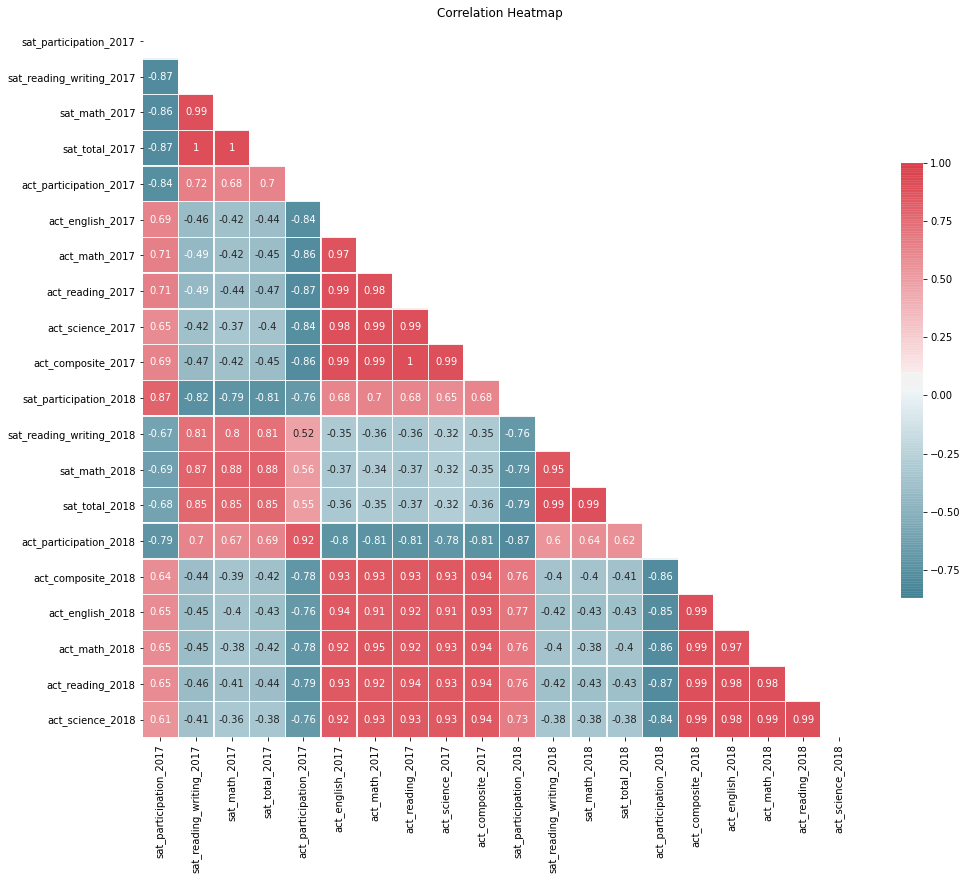

In [176]:
corr = final.corr().round(2)
f, ax = plt.subplots(figsize=(16, 16))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, ax=ax, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5}, alpha=.9, annot=True)
plt.title('Correlation Heatmap')
plt.show()

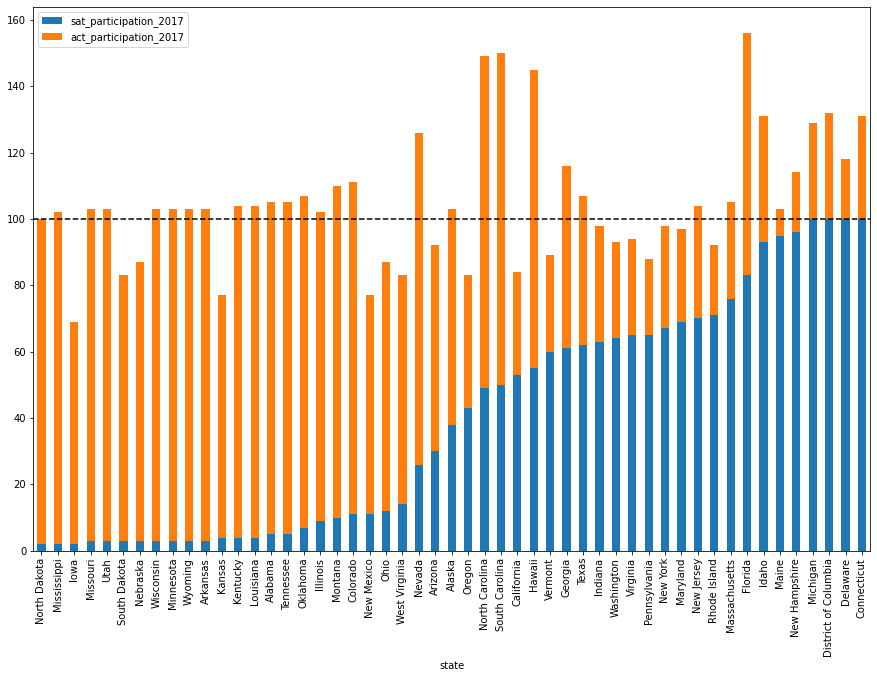

In [178]:
participation_2017 = final[['state', 'sat_participation_2017', 'act_participation_2017']].sort_values('sat_participation_2017')
participation_2017 = participation_2017.set_index('state')
participation_2017.plot(kind='bar', stacked=True, figsize=(15,10))
plt.axhline(y=100, c='k', ls='--')
plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [179]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column]) 
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylim(0, 20)
        ax[i].set_title(list_of_titles[i], pad=15.0)
        ax[i].axvline(dataframe[column].median(), color='k', ls='--')
        ax[i].annotate('  Median\n  '+str(dataframe[column].median()), (dataframe[column].median(),17.5))
        ax[i].axvline(dataframe[column].quantile(0.25), color='red', ls='--')
        ax[i].axvline(dataframe[column].quantile(0.75), color='green', ls='--')
    fig.tight_layout(pad=2.0)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

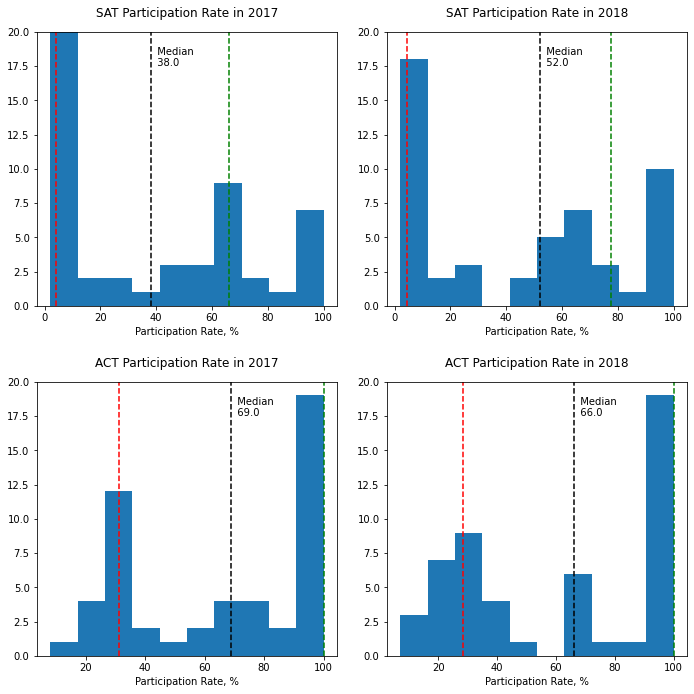

In [180]:
columns = ['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']
titles = ['SAT Participation Rate in 2017', 'SAT Participation Rate in 2018', 'ACT Participation Rate in 2017', 'ACT Participation Rate in 2018']
xlabels = ['Participation Rate, %']*4
subplot_histograms(final, columns, titles, xlabels)

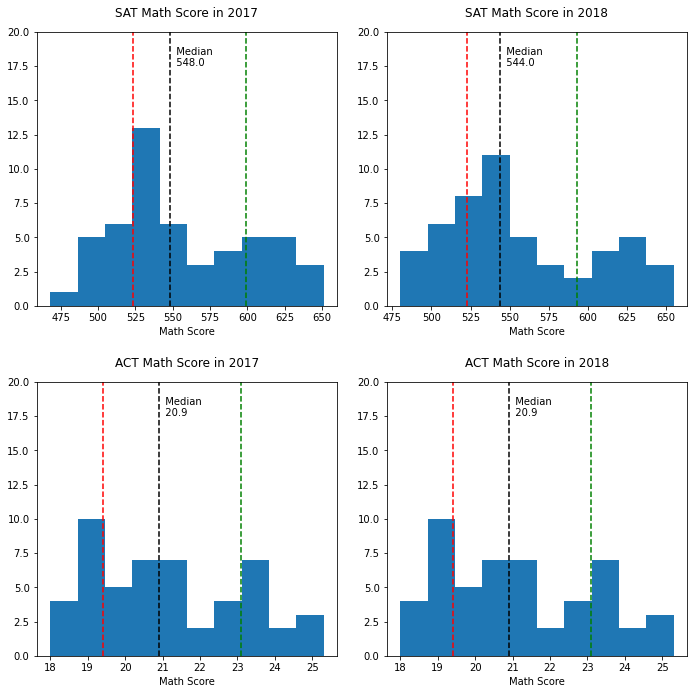

In [181]:
columns = ['sat_math_2017', 'sat_math_2018', 'act_math_2017', 'act_math_2017']
titles = ['SAT Math Score in 2017', 'SAT Math Score in 2018', 'ACT Math Score in 2017', 'ACT Math Score in 2018']
xlabels = ['Math Score']*4
subplot_histograms(final, columns, titles, xlabels)

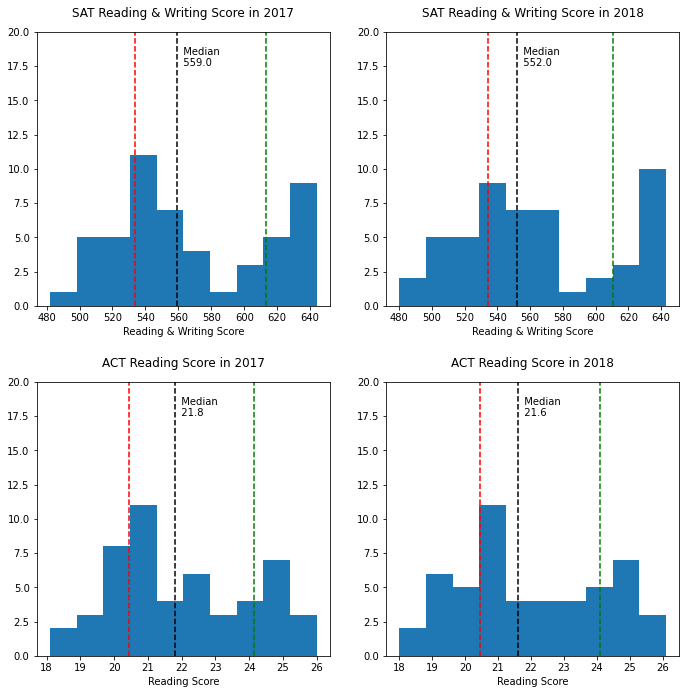

In [182]:
columns = ['sat_reading_writing_2017', 'sat_reading_writing_2018', 'act_reading_2017', 'act_reading_2018']
titles = ['SAT Reading & Writing Score in 2017', 'SAT Reading & Writing Score in 2018',
         'ACT Reading Score in 2017', 'ACT Reading Score in 2018']
xlabels = ['Reading & Writing Score']*2 + ['Reading Score']*2
subplot_histograms(final, columns, titles, xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [205]:
def plot_scatter(x,y,title):
    # Plotting scatter point
    plt.figure(figsize=(8,6))
    plt.scatter(final[x], final[y])
    plt.title(title)
    plt.xlabel(x.replace('_',' ').title())
    plt.ylabel(y.replace('_',' ').title())
    
    # Plotting trend line
    z = np.polyfit(final[x], final[y], 1)
    p = np.poly1d(z)
    plt.plot(final[x],p(final[x]), color='red')
    
    # Displaying plot
    plt.show()

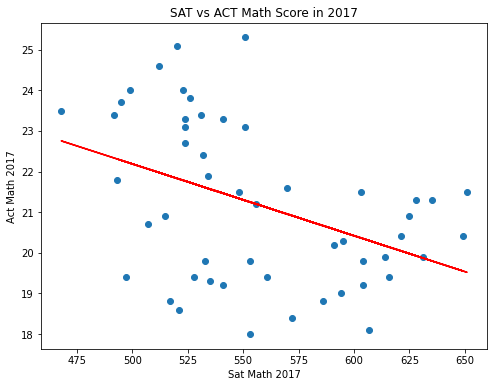

In [206]:
plot_scatter('sat_math_2017','act_math_2017','SAT vs ACT Math Score in 2017')

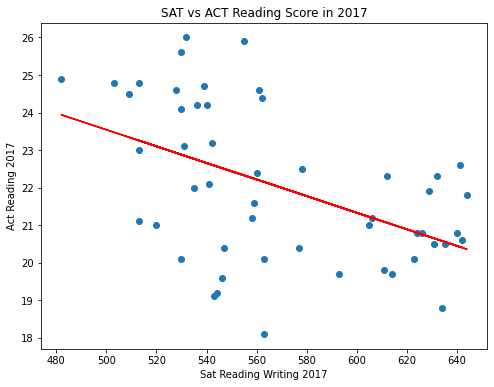

In [207]:
plot_scatter('sat_reading_writing_2017','act_reading_2017','SAT vs ACT Reading Score in 2017')

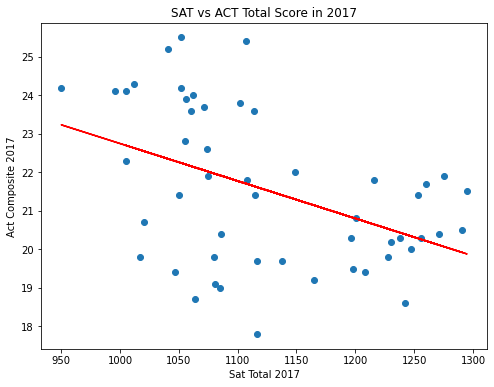

In [208]:
plot_scatter('sat_total_2017','act_composite_2017','SAT vs ACT Total Score in 2017')

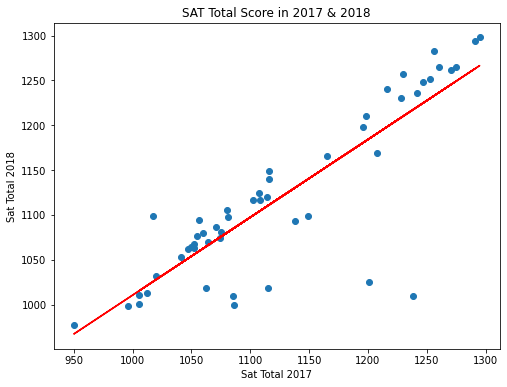

In [210]:
plot_scatter('sat_total_2017','sat_total_2018','SAT Total Score in 2017 & 2018')

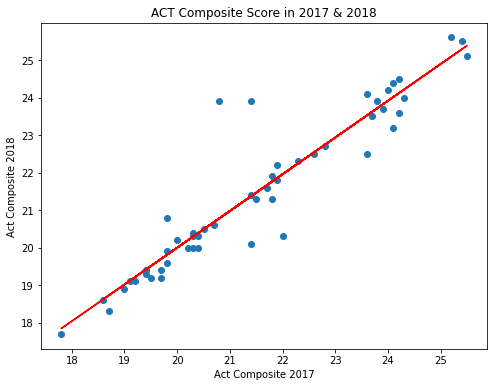

In [211]:
plot_scatter('act_composite_2017','act_composite_2018','ACT Composite Score in 2017 & 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [260]:
# Customized Box Plot Function
def plot_box(cols, xlabel, title):
    plt.figure(figsize=(8,8))
    temp_df = final[cols]
    sns.boxplot(y='variable', x='value', data=pd.melt(temp_df))
    plt.ylabel('')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

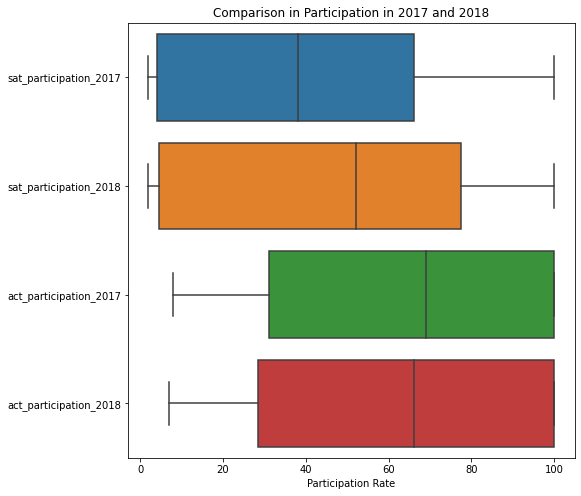

In [259]:
# Participation Comparison
title = 'Comparison in Participation in 2017 and 2018'
plot_box(['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']
        , 'Participation Rate', title)

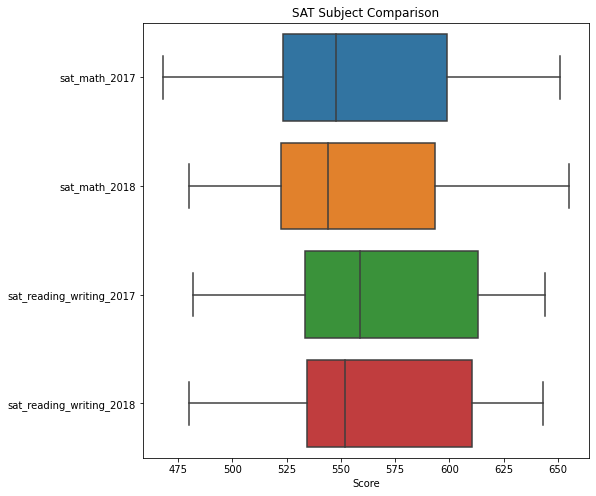

In [257]:
# SAT subject comparison
title = 'SAT Subject Comparison'
columns = ['sat_math_2017', 'sat_math_2018', 'sat_reading_writing_2017', 'sat_reading_writing_2018',]
plot_box(columns, 'Score', title)

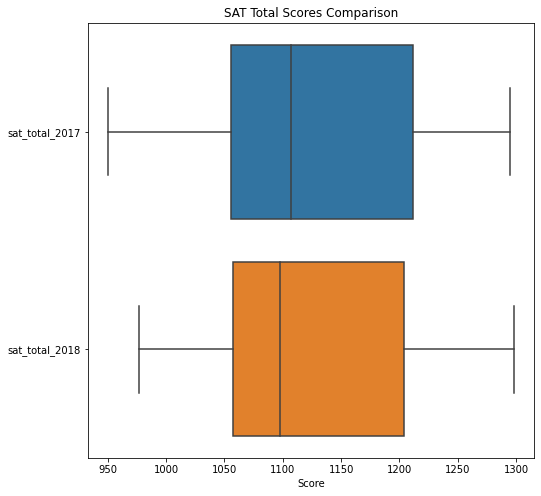

In [256]:
# SAT total score comparison
title = 'SAT Total Scores Comparison'
columns = ['sat_total_2017', 'sat_total_2018']
plot_box(columns, 'Score', title)

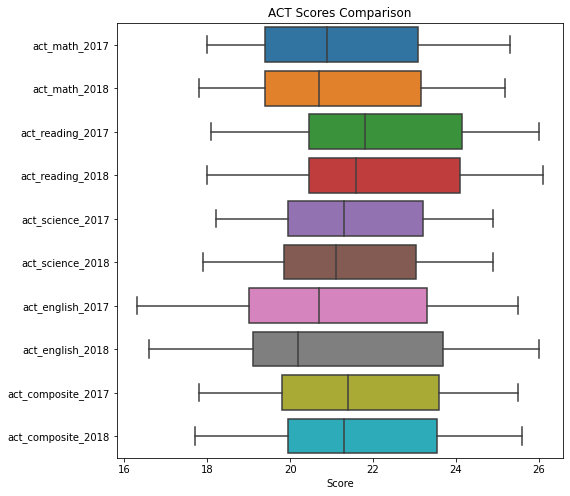

In [253]:
# ACT scores comparison
title = 'ACT Scores Comparison'
columns = ['act_math_2017', 'act_math_2018', 'act_reading_2017', 'act_reading_2018',
           'act_science_2017', 'act_science_2018', 'act_english_2017', 'act_english_2018',
           'act_composite_2017', 'act_composite_2018']
plot_box(columns, 'Score', title)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [443]:
final['act_sat_tilt_2017'] = (final['sat_participation_2017'] - final['act_participation_2017'])/100
final['act_sat_tilt_2018'] = (final['sat_participation_2018'] - final['act_participation_2018'])/100

In [458]:
def plot_scatter(x,y,c,title):
    # Plotting scatter point
    plt.figure(figsize=(8,9))
    plt.scatter(final[x], final[y], c=final[c], cmap=plt.cm.get_cmap('RdYlBu', 5), s=50, lw=0.5, edgecolor='k')
    plt.title(title)
    plt.xlabel(x.replace('_',' ').title())
    plt.ylabel(y.replace('_',' ').title())
    
    # Plotting trend line
    z = np.polyfit(final[x], final[y], 1)
    p = np.poly1d(z)
    plt.plot([final[x].min(),final[x].max()],p([final[x].min(),final[x].max()]), color='blue', ls='dashed')
    plt.colorbar(label=c.replace('_',' ').title(), orientation='horizontal', shrink=0.3,
                 pad=0.1)
    
    # Displaying plot
    plt.show()

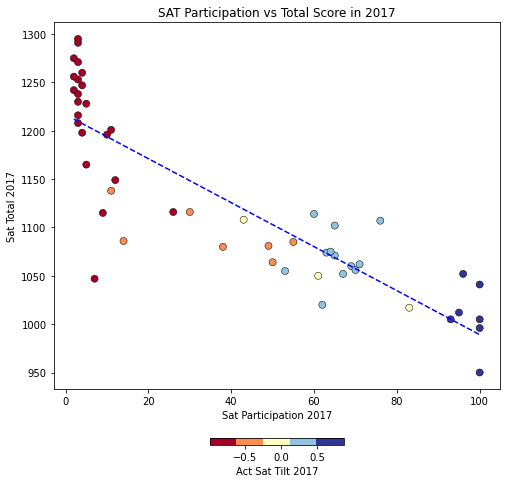

In [459]:
plot_scatter('sat_participation_2017', 'sat_total_2017', 'act_sat_tilt_2017', 'SAT Participation vs Total Score in 2017')

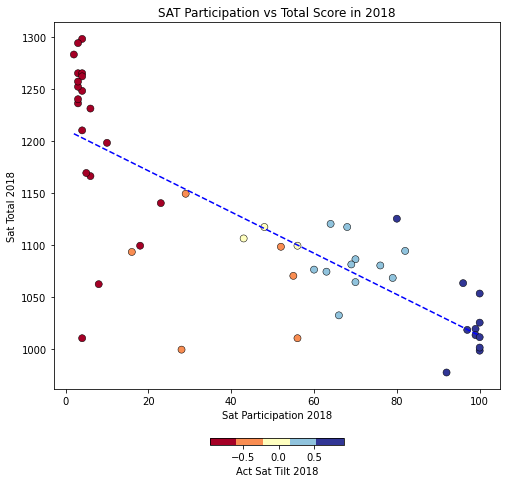

In [460]:
plot_scatter('sat_participation_2018', 'sat_total_2018', 'act_sat_tilt_2018', 'SAT Participation vs Total Score in 2018')

In [446]:
final['sat_growth'] = final['sat_participation_2018'] - final['sat_participation_2017']
final['act_growth'] = final['act_participation_2018'] - final['act_participation_2017']

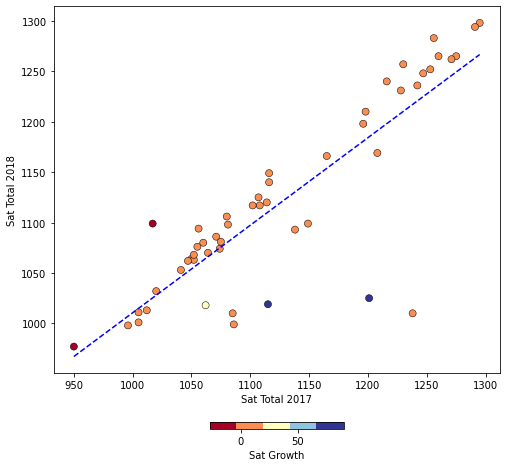

In [461]:
plot_scatter('sat_total_2017', 'sat_total_2018', 'sat_growth', '')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

![Choropleth Map of SAT vs ACT Preferences in the U.S.](../img/sat_vs_act_map.png "Choropleth Map of SAT vs ACT Preferences in the U.S.")

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [248]:
def florida_comparison_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylim(0, 20)
        ax[i].set_title(list_of_titles[i], pad=15.0)
        ax[i].axvline(dataframe[column].median(), color='k', ls='--')
        ax[i].annotate('  Median\n  '+str(dataframe[column].median()), (dataframe[column].median(),17.5))
        # ax[i].axvline(dataframe[column].quantile(0.25), color='red', ls='--')
        # ax[i].axvline(dataframe[column].quantile(0.75), color='green', ls='--')
        ax[i].axvline(final.loc[final['state']=='Florida'][column].values, color='blue', ls='--')
        # ax[i].spines['right'].set_visible(False)
        # ax[i].spines['top'].set_visible(False)
    fig.tight_layout(pad=2.0)
        # Set titles, labels, etc here for each subplot

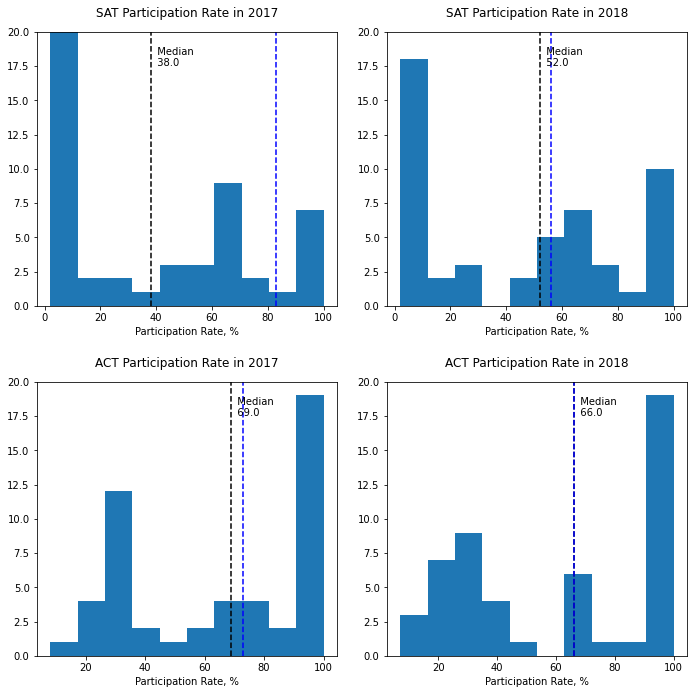

In [249]:
columns = ['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']
titles = ['SAT Participation Rate in 2017', 'SAT Participation Rate in 2018', 'ACT Participation Rate in 2017', 'ACT Participation Rate in 2018']
xlabels = ['Participation Rate, %']*4
florida_comparison_histograms(final, columns, titles, xlabels)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?